In [ ]:
w!pip install yfinance

     |████████████████████████████████| 6.3 MB 11.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=200a81db1902e65e3ea43405768ce3a3576a0357e408efe1fd1a7fba6d3e5adf
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:

import seaborn as sns
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
#df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021/06/01')
#show the data
#df
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd

yf.pdr_override()

start = datetime.strptime('2014-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-06-01', '%Y-%m-%d')

df = pdr.get_data_yahoo("AAPL", start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.568451,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.182550,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.276245,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,17.152693,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.261324,258529600
...,...,...,...,...,...,...
2021-05-24,126.010002,127.940002,125.940002,127.099998,127.099998,63092900
2021-05-25,127.820000,128.320007,126.320000,126.900002,126.900002,72009500
2021-05-26,126.959999,127.389999,126.419998,126.849998,126.849998,56575900


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'close Price')

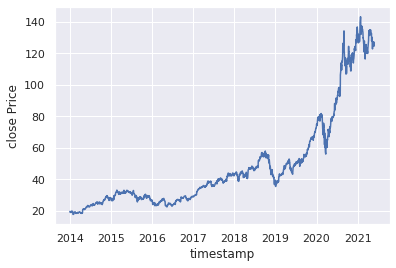

In [ ]:
sns.set()
df['timestamp'] = df.index
df['timestamp'] = pd.to_datetime(df['timestamp'])
sns.lineplot(df['timestamp'], df['Close'])
plt.ylabel("close Price")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Returns')

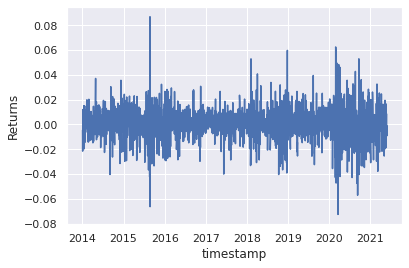

In [ ]:
df['returns'] = (df['Close']-df['Open'])/df['Open']
sns.lineplot(df['timestamp'], df['returns'])
plt.ylabel("Returns")

In [ ]:
forecast_out = 60
df['prediction'] = df[['Close']].shift(-forecast_out)
X = np.array(df['Close']).reshape(-1,1)
X = X[:-forecast_out]
y = np.array(df['prediction'])
y = y[:-forecast_out]
y

array([ 19.16928673,  19.34464264,  19.37678528, ..., 126.84999847,
       125.27999878, 124.61000061])

In [ ]:
reg = RandomForestRegressor(n_estimators = 300, max_depth =300, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)
reg.fit(X_train, y_train)
print("Performance (R^2): ", reg.score(X_test, y_test))

NameError: ignored